
<font size="7">__Leaf Identification Model__</font>


## Project Description
In this Machine Learning project, there are six sets of totally different images. All sets have 100 images each of Cherry Blossom, Gingko, Japanese Maple, Red Oak, Silver Birch and Sweet Gum leaves. All these images are in the Folder, /Images.

create a model such that it is capable of recognizing an unknown leaf and distinguish it accurately.<br>
create a deep learning model for image classification

There is also a Test_Set, containing six Folders each containing images of differenr type of leaves. So, model accuracy can be evaluated with this test_set. Later, model will be used to predict if a single unknown image is of what specie of leaf.<br>


In this exercise our objective is to perform the following tasks:

1. Import the set of images
2. Preprocessing dataset
3. Building an appropriate CNN model
4. Training the CNN model
5. Making Prediction off the trained model
6. Checking Accuracy of Model

## Importing the Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [26]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

- ImageDataGenerator is a class in Keras that helps generate augmented batches of image data during the training of a NN. Data augmentation involves applying random transformations to the input data, such as rotation, zooming, and horizontal/vertical flipping. This helps to artificially increase the diversity of the training dataset, which can improve the generalization of the model

## Data Preprocessing

### Preprocessing the Training Set

- After, runnung this code, the training_set can be used to feed batches of augmented images and their labels to your model during training.

In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2) # Specify 20% for validation
training_set = train_datagen.flow_from_directory('C:\\Users\Pegah\Downloads\LeavesIdentifier\Images\Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')  # Specify that this is the training set
validation_set = train_datagen.flow_from_directory('C:\\Users\Pegah\Downloads\LeavesIdentifier\Images\Train',
                                                   target_size=(64, 64),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')  # Specify that this is the validation set

Found 337 images belonging to 6 classes.
Found 83 images belonging to 6 classes.


- rescale=1./255: Rescales the pixel values of the images to be in the range [0, 1]. This is a common preprocessing step for NN as it helps in numerical stability during training.
- shear_range: Randomly applies shearing transformations. The image can be sheared by a maximum of 0.2 times its width in either direction.
- zoom_range: Randomly applies zooming transformations. The image can be zoomed in or out by a maximum of 20%.
- horizontal_flip: Randomly flips images horizontally.

- 'PATH': This is the path to the directory containing the training images.
- target_size=(64, 64): Resizes the input images to a fixed size of 64x64 pixels.
- batch_size=32: Number of images in each batch during training.
- class_mode='categorical': Since you are working with a categorical classification problem, this parameter indicates that the labels are provided as one-hot encoded categorical labels.

### Preprocessing the Test Set

- Setting up an image data generator for your test set using the flow_from_directory function from Keras

In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:\\Users\Pegah\Downloads\LeavesIdentifier\Images\Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 190 images belonging to 6 classes.


- target_size=(64, 64): It's important to use the same target size as used during training.
- After running this code, the test_set can be used to evaluate your neural network on the test data

## Building the CNN Model

- Create a CNN model for image classification

### Step 1 - Initialising the Model

In [29]:
Model = tf.keras.models.Sequential()

- In Keras, the Sequential class represents a linear stack of layers. You can add layers to this model one by one in a sequential fashion

### Step 2 - Adding First Convolution Layer 
The number of filters directly affects the accuracy level of the model, increasing it will increase the accuracy.

In [30]:
Model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=[64, 64, 3]))

- A convolutional layer is added to the model to capture features in the input images (the essence of leaf patterns).
- filters=10: Number of filters/kernels in the layer. These filters learn different aspects of the input images.
- kernel_size=5: Size of the convolutional kernels, a 5x5 grid that moves across the input image.
- activation='relu': Rectified Linear Unit activation function to introduce non-linearity.
- input_shape=[64, 64, 3]: This is the shape of the input data that the model expects. a 64x64 image with 3 channels (RGB).

### Step 3 - Pooling the First Layer

In [31]:
Model.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=2))

- Max pooling is a down-sampling operation that reduces the spatial dimensions of the input data.making the model more computationally efficient.
- pool_size=4: Pooling window size, which extracts the maximum value from a 4x4 window.
- strides=2: It specifies the step size to move the pooling window. In this case, the window moves 2 units at a time.

### Step 4 - Adding a Second Convolutional Layer

- Add more layers for deeper understanding

In [32]:
Model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'))

- you can increase the number of filters for deeper feature extraction.Further increasing the complexity by adding more filters.

### Step 5 - Pooling the Second Layer

In [33]:
Model.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=2))

### Step 6 - Flattening

In [34]:
Model.add(tf.keras.layers.Flatten())

- Flatten layer converts the multi-dimensional input data to a flat vector, preparing it for dense layers.
- The earlier layers capture patterns in the input images. The Flatten layer is often used to transition from these convolutional/pooling layers to fully connected (dense) layers.

### Step 7 - Full Connection

- This adds a fully connected (dense) layer to the model.Dense layers for profound connections between leaf features

In [35]:
Model.add(tf.keras.layers.Dense(units=32, activation='relu'))

- 128: Number of neurons in the dense layer.
- activation='relu': Rectified Linear Unit activation function.

### Step 8 - Output Layer
For classes greater than two, a softmax activation function is used

In [36]:
Model.add(tf.keras.layers.Dense(units=6, activation='softmax')) # units = number of classes

- units: Number of output classes (e.g., types of leaves).
- activation='softmax': Activation function for multi-class classification. It produces class probabilities.
- Each node in the output layer will output a probability representing the likelihood of the input belonging to a particular class. The probabilities from all neurons sum to 1. 

### Step 9 - Compiling the CNN
In case of N-classes, categorical crossentropy method is used, with nadam optimizer

In [37]:
Model.compile(loss='categorical_crossentropy', optimizer='nadam',metrics=['accuracy'])

- Compile your model with optimization and loss calculation
- optimizer='nadam': Adam optimization algorithm, a popular choice for gradient-based optimization.
- loss='categorical_crossentropy': Loss function for multi-class classification, where the target is one-hot encoded (each sample belongs to exactly one class). It measures the difference between the true distribution and the predicted distribution.
- metrics=['accuracy']: Evaluate and display the accuracy during training. It represents the proportion of correctly classified samples.

## Training the CNN and Evaluation

- The epochs parameter specifies the number of times the model will iterate over the entire training dataset. 

In [38]:
history=Model.fit(x = training_set, validation_data = validation_set, epochs = 35) #check with 16, 16 and 32

Epoch 1/35
11/11 [==============================] - 104s 10s/step - loss: 1.8018 - accuracy: 0.2018 - val_loss: 1.7413 - val_accuracy: 0.3133
Epoch 2/35
11/11 [==============================] - 93s 9s/step - loss: 1.7033 - accuracy: 0.2938 - val_loss: 1.6423 - val_accuracy: 0.2048
Epoch 3/35
11/11 [==============================] - 98s 9s/step - loss: 1.5455 - accuracy: 0.4095 - val_loss: 1.3526 - val_accuracy: 0.6506
Epoch 4/35
11/11 [==============================] - 101s 9s/step - loss: 1.2491 - accuracy: 0.6024 - val_loss: 1.2795 - val_accuracy: 0.5542
Epoch 5/35
11/11 [==============================] - 95s 9s/step - loss: 1.0659 - accuracy: 0.6380 - val_loss: 0.9196 - val_accuracy: 0.7349
Epoch 6/35
11/11 [==============================] - 93s 9s/step - loss: 0.8179 - accuracy: 0.7300 - val_loss: 0.7287 - val_accuracy: 0.7711
Epoch 7/35
11/11 [==============================] - 97s 9s/step - loss: 0.7474 - accuracy: 0.7567 - val_loss: 0.6404 - val_accuracy: 0.7590
Epoch 8/35
11/11 

## Making a Prediction

In [43]:
import numpy as np
import os #It is used for file and path manipulation.
from keras.preprocessing import image
path = r'C:\Users\Pegah\Downloads\LeavesIdentifier\Unkown\Leaf'
for img in os.listdir(path): 
# Iterates over the list of files in the specified directory
    test_image = image.load_img(path+"/"+img, target_size = (64, 64)) #Loads an image file and resizes it.
    test_image = image.img_to_array(test_image) #Converts the image to a NumPy array.
    test_image = np.expand_dims(test_image, axis = 0) #Adds an extra dimension to match the model's input shape.
    predict = Model.predict(test_image) #Makes another prediction for later use.
    print(predict)
    if predict[0][0] == 1:
        prediction = 'Cherry Blossom'
    elif predict[0][1] == 1:
        prediction = 'Gingko'
    elif predict[0][2] == 1:
        prediction = 'Japanese Maple'
    elif predict[0][3] == 1:
        prediction = 'Red Oak'
    elif predict[0][4] == 1:
        prediction = 'Silver Birch'
    elif predict[0][5] == 1:
        prediction = "Sweet Gum"
    print(img + " = "+ prediction)

[[1. 0. 0. 0. 0. 0.]]
Leaf_1.jpg = Cherry Blossom
[[0. 1. 0. 0. 0. 0.]]
Leaf_10.jpg = Gingko
[[0. 0. 1. 0. 0. 0.]]
Leaf_11.jpg = Japanese Maple
[[0. 0. 0. 0. 0. 1.]]
Leaf_12.jpg = Sweet Gum
[[0. 0. 1. 0. 0. 0.]]
Leaf_13.jpg = Japanese Maple
[[0. 0. 0. 0. 0. 1.]]
Leaf_14.jpg = Sweet Gum
[[1. 0. 0. 0. 0. 0.]]
Leaf_15.jpg = Cherry Blossom
[[0. 0. 0. 1. 0. 0.]]
Leaf_16.jpg = Red Oak
[[1. 0. 0. 0. 0. 0.]]
Leaf_17.jpg = Cherry Blossom
[[0. 0. 0. 0. 0. 1.]]
Leaf_18.jpg = Sweet Gum
[[0. 0. 0. 0. 0. 1.]]
Leaf_19.jpg = Sweet Gum
[[0. 0. 0. 0. 0. 1.]]
Leaf_2.jpg = Sweet Gum
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 8.993203e-36
  1.000000e+00]]
Leaf_20.jpg = Sweet Gum
[[0. 0. 0. 0. 0. 1.]]
Leaf_21.jpg = Sweet Gum
[[0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  7.115816e-12]]
Leaf_22.jpg = Gingko
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0683244e-34]]
Leaf_23.jpg = Silver Birch
[[0. 0. 1. 0. 0. 0.]]
Leaf_24.jpg = Japanese Maple
[[0

In [44]:
test_image = image.load_img(r'C:\Users\Pegah\Downloads\LeavesIdentifier\Unkown\Leaf\Leaf_12.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predict = Model.predict(test_image)
if predict[0][0] == 1:
    prediction = 'Cherry Blossom'
elif predict[0][1] == 1:
    prediction = 'Gingko'
elif predict[0][2] == 1:
    prediction = 'Japanese Maple'
elif predict[0][3] == 1:
    prediction = 'Red Oak'
elif predict[0][4] == 1:
    prediction = 'Silver Birch'
elif predict[0][5] == 1:
    prediction = "Sweet Gum"
print(prediction)

Sweet Gum


## Model Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


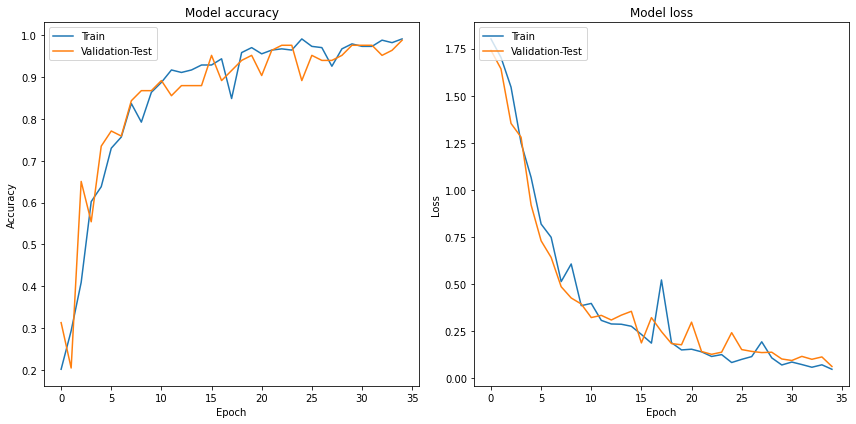

In [45]:
print(history.history.keys())
import matplotlib.pyplot as plt

# Plotting learning curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])  # Change 'accuracy' to 'acc'
plt.plot(history.history['val_accuracy'])  # Change 'val_accuracy' to 'val_acc'
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation-Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation-Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [46]:
test_accuracy = Model.evaluate(test_set)
print(f'Test Accuracy: {test_accuracy[1]}')

6/6 [==============================] - 38s 6s/step - loss: 0.2123 - accuracy: 0.9474
Test Accuracy: 0.9473684430122375


#### The CNN classification model was found to be 94.74 % accurate on test set. 

##### End